In [2]:
import numpy as np
import os
import pandas as pd 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import shutil

In [3]:
print(os.getcwd())    
base_dir = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic", 
              "im_Parabasal", "im_Superficial-Intermediate"]

/kaggle/working


In [4]:
sns.set(style="whitegrid")

In [5]:
image_counts = {}

for category in categories:
    category_path = os.path.join(base_dir, category, category, "CROPPED")  
    image_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.bmp'))])

print(image_counts)

{'im_Dyskeratotic': 813, 'im_Koilocytotic': 825, 'im_Metaplastic': 793, 'im_Parabasal': 787, 'im_Superficial-Intermediate': 831}


In [6]:
def resize_image_and_scale_coords(image_path, cyt_dat_path, nuc_dat_path, output_category_dir):
    image = Image.open(image_path)
    original_width, original_height = image.size

    resized_image = image.resize((224, 224))
    resized_image.save(os.path.join(output_category_dir, os.path.basename(image_path)))

    scale_x = 224 / original_width
    scale_y = 224 / original_height

    for dat_path in [cyt_dat_path, nuc_dat_path]:
        scaled_coords = []
        with open(dat_path, 'r') as file:
            for line in file.readlines():
                x, y = map(float, line.strip().split(','))
                scaled_x = x * scale_x
                scaled_y = y * scale_y
                scaled_coords.append(f"{scaled_x:.2f},{scaled_y:.2f}")

        output_dat_path = os.path.join(output_category_dir, os.path.basename(dat_path))
        with open(output_dat_path, 'w') as file:
            file.write("\n".join(scaled_coords))

def process_dataset(data_dir, output_dir, categories):
    os.makedirs(output_dir, exist_ok=True)

    for category in categories:
        input_category_dir = os.path.join(data_dir, category, category, "CROPPED")
        output_category_dir = os.path.join(output_dir, category)
        os.makedirs(output_category_dir, exist_ok=True)

        for file in os.listdir(input_category_dir):
            if file.endswith('.bmp'):
                prefix = file.split('.bmp')[0]
                image_path = os.path.join(input_category_dir, file)
                cyt_dat_path = os.path.join(input_category_dir, f"{prefix}_cyt.dat")
                nuc_dat_path = os.path.join(input_category_dir, f"{prefix}_nuc.dat")

                if os.path.exists(cyt_dat_path) and os.path.exists(nuc_dat_path):
                    resize_image_and_scale_coords(image_path, cyt_dat_path, nuc_dat_path, output_category_dir)

data_dir = base_dir
output_dir = "/kaggle/working/resized-dataset"
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic", "im_Parabasal", "im_Superficial-Intermediate"]

process_dataset(data_dir, output_dir, categories)
print("Dataset processed and saved in category-wise folders.")


Dataset processed and saved in category-wise folders.


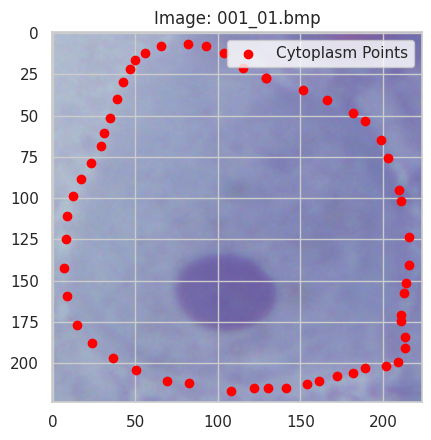

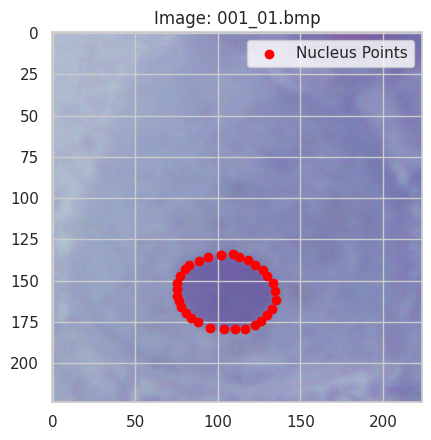

In [7]:
def visualize_resized_image_with_coords(image_path, dat_file, label):
    image = Image.open(image_path)
    coordinates = []
    with open(dat_file, 'r') as file:
        for line in file.readlines():
            x, y = map(float, line.strip().split(','))
            coordinates.append((x, y))

    plt.imshow(image)
    x_coords, y_coords = zip(*coordinates)
    plt.scatter(x_coords, y_coords, c='red', label=label)
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.legend()
    plt.show()

image_path = f"{output_dir}/im_Parabasal/001_01.bmp"
cyt_dat_path = f"{output_dir}/im_Parabasal/001_01_cyt.dat"
nuc_dat_path = f"{output_dir}/im_Parabasal/001_01_nuc.dat"

visualize_resized_image_with_coords(image_path, cyt_dat_path, "Cytoplasm Points")
visualize_resized_image_with_coords(image_path, nuc_dat_path, "Nucleus Points")


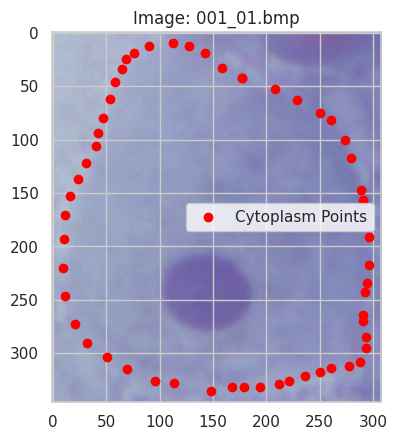

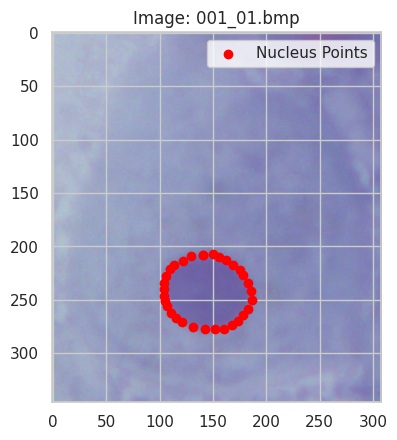

In [8]:
def visualize_resized_image_with_coords(image_path, dat_file, label):
    image = Image.open(image_path)
    coordinates = []
    with open(dat_file, 'r') as file:
        for line in file.readlines():
            x, y = map(float, line.strip().split(','))
            coordinates.append((x, y))

    plt.imshow(image)
    x_coords, y_coords = zip(*coordinates)
    plt.scatter(x_coords, y_coords, c='red', label=label)
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.legend()
    plt.show()

image_path = f"{base_dir}/im_Parabasal/im_Parabasal/CROPPED/001_01.bmp"
cyt_dat_path = f"{base_dir}/im_Parabasal/im_Parabasal/CROPPED/001_01_cyt.dat"
nuc_dat_path = f"{base_dir}/im_Parabasal/im_Parabasal/CROPPED/001_01_nuc.dat"

visualize_resized_image_with_coords(image_path, cyt_dat_path, "Cytoplasm Points")
visualize_resized_image_with_coords(image_path, nuc_dat_path, "Nucleus Points")


In [9]:
dataset = output_dir
image_counts = {}

for category in categories:
    category_path = os.path.join(dataset, category)  
    image_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))])

print(image_counts)

{'im_Dyskeratotic': 813, 'im_Koilocytotic': 825, 'im_Metaplastic': 793, 'im_Parabasal': 787, 'im_Superficial-Intermediate': 831}


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


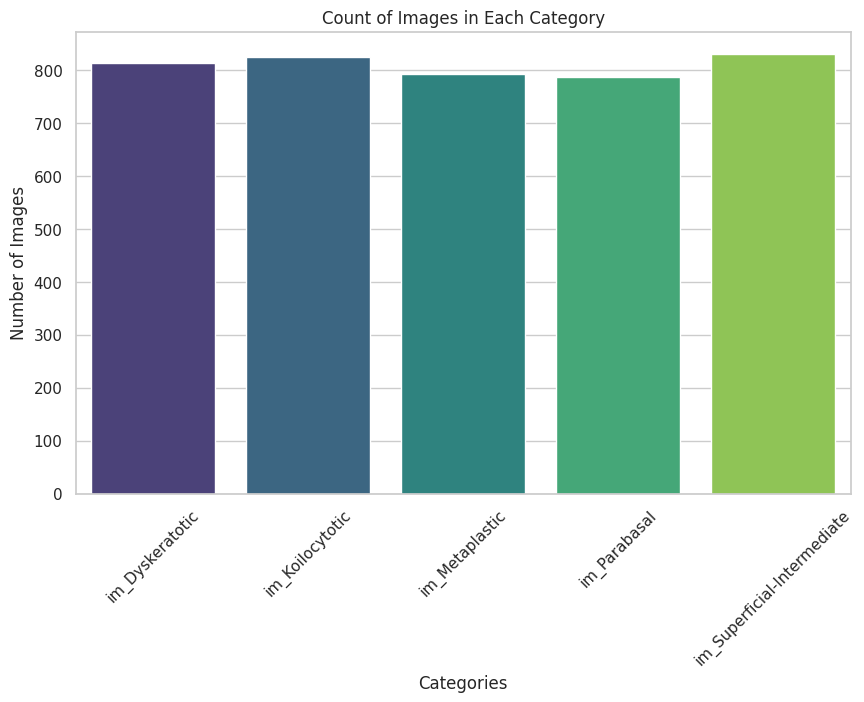

In [10]:
plt.figure(figsize = (10, 6))
sns.barplot(x = list(image_counts.keys()), y = list(image_counts.values()), palette ='viridis')
plt.title('Count of Images in Each Category')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation = 45)
plt.show()

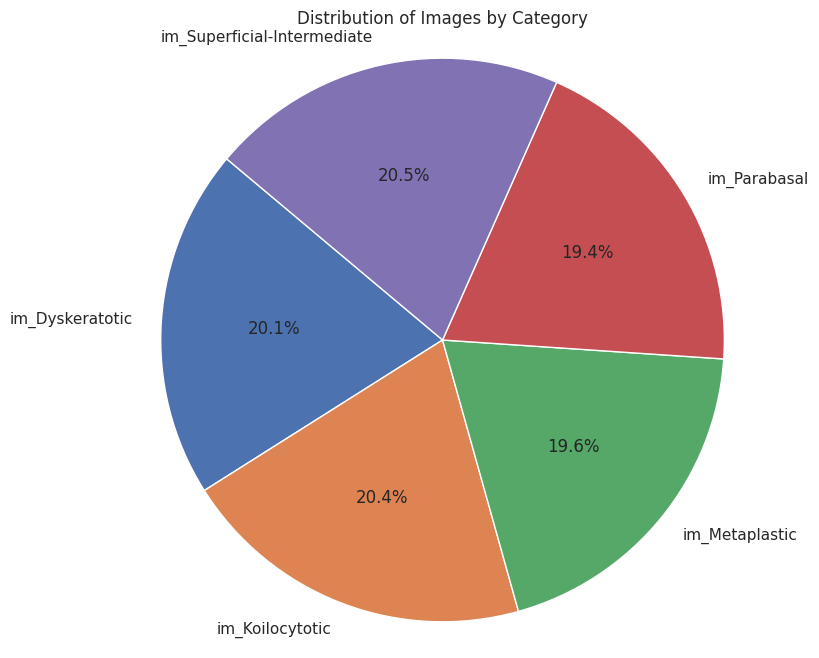

In [11]:
plt.figure(figsize = (8, 8))
plt.pie(image_counts.values(), labels = image_counts.keys(), autopct = '%1.1f%%', startangle = 140)
plt.title('Distribution of Images by Category')
plt.axis('equal') 
plt.show()

In [12]:
def display_images_from_folders(base_dir, categories, num_images=5):
    plt.figure(figsize=(15, 10))
    
    for i, category in enumerate(categories):
        category_path = os.path.join(base_dir, category)
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]
        
        for j, image_file in enumerate(image_files[:num_images]):
    
            img_path = os.path.join(category_path, image_file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            
            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(image)
            plt.axis('off')  
            plt.title(f"{category}") 

    plt.tight_layout()
    plt.show()

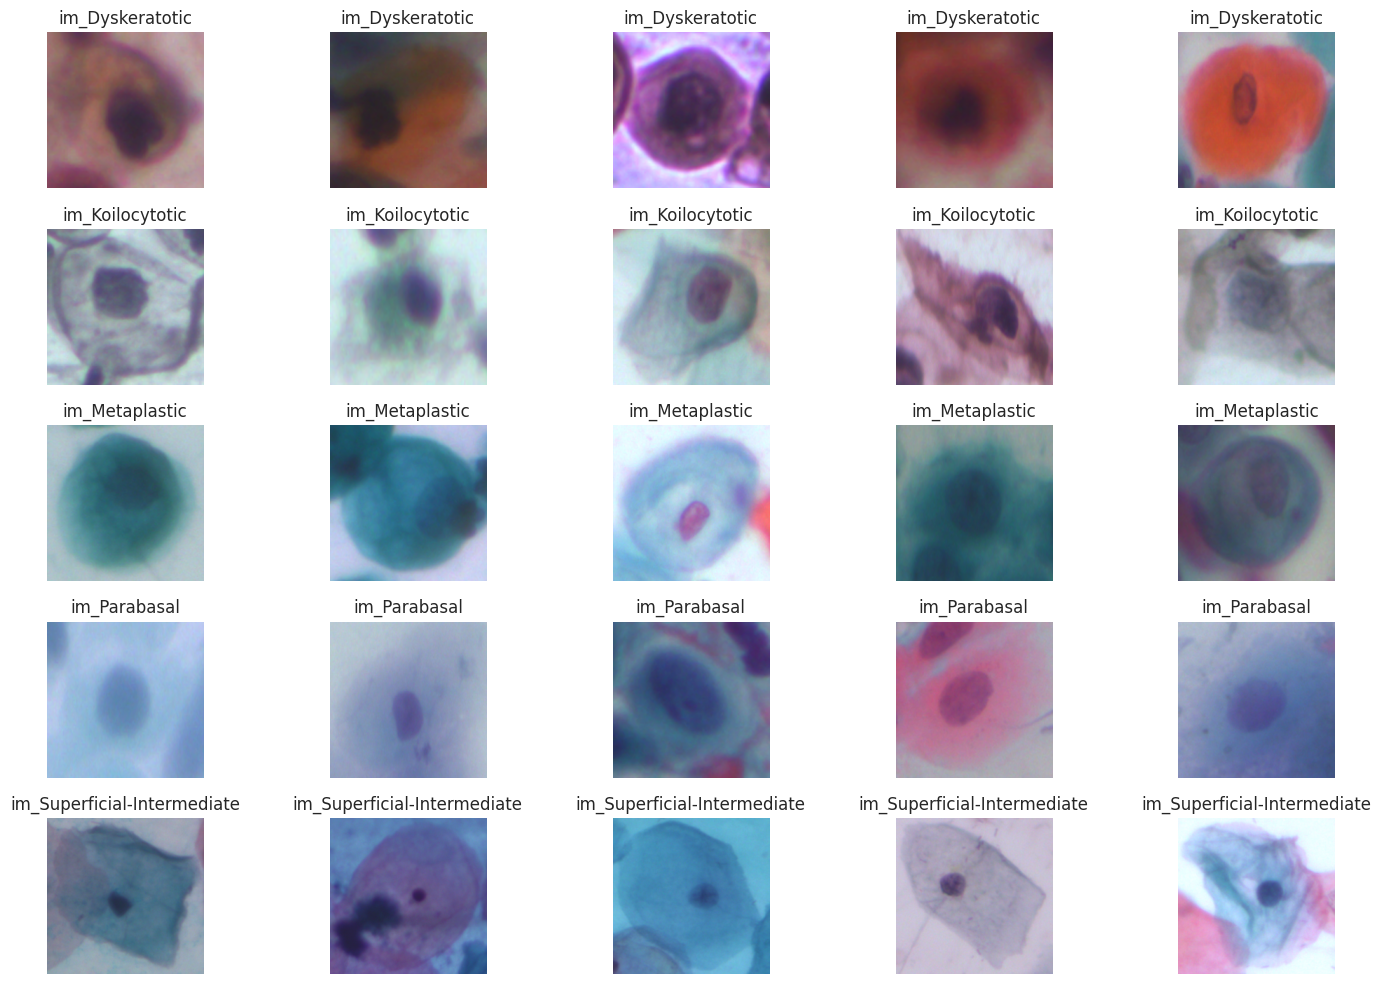

In [13]:
display_images_from_folders(dataset, categories, num_images=5)

In [14]:

def create_image_paths_dataframe(base_dir, categories):
    data = []  

    for category in categories:
        category_path = os.path.join(base_dir, category)
        
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

        for image_file in image_files:
            img_path = os.path.join(category_path, image_file)
            data.append({'image_path': img_path, 'label': category})

    df_image_paths = pd.DataFrame(data)

    return df_image_paths

In [15]:
df_image_paths = create_image_paths_dataframe(dataset, categories)
print(df_image_paths.head())
print(df_image_paths.tail())

                                          image_path            label
0  /kaggle/working/resized-dataset/im_Dyskeratoti...  im_Dyskeratotic
1  /kaggle/working/resized-dataset/im_Dyskeratoti...  im_Dyskeratotic
2  /kaggle/working/resized-dataset/im_Dyskeratoti...  im_Dyskeratotic
3  /kaggle/working/resized-dataset/im_Dyskeratoti...  im_Dyskeratotic
4  /kaggle/working/resized-dataset/im_Dyskeratoti...  im_Dyskeratotic
                                             image_path  \
4044  /kaggle/working/resized-dataset/im_Superficial...   
4045  /kaggle/working/resized-dataset/im_Superficial...   
4046  /kaggle/working/resized-dataset/im_Superficial...   
4047  /kaggle/working/resized-dataset/im_Superficial...   
4048  /kaggle/working/resized-dataset/im_Superficial...   

                            label  
4044  im_Superficial-Intermediate  
4045  im_Superficial-Intermediate  
4046  im_Superficial-Intermediate  
4047  im_Superficial-Intermediate  
4048  im_Superficial-Intermediate  


In [16]:
df_image_paths['label'].value_counts()

label
im_Superficial-Intermediate    831
im_Koilocytotic                825
im_Dyskeratotic                813
im_Metaplastic                 793
im_Parabasal                   787
Name: count, dtype: int64

# Data Splitting

In [17]:

def TrainValTestSplit(df_image_paths, output_dir, val_ratio=0.15, test_ratio=0.15):
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(output_dir, split)
        os.makedirs(split_dir, exist_ok=True)

    categories = df_image_paths['label'].unique()
    for split in ['train', 'val', 'test']:
        for category in categories:
            category_dir = os.path.join(output_dir, split, category)
            os.makedirs(category_dir, exist_ok=True)

    for category in categories:
        category_data = df_image_paths[df_image_paths['label'] == category]
        image_paths = category_data['image_path'].tolist()

        np.random.shuffle(image_paths)

        train_split = int(len(image_paths) * (1 - (val_ratio + test_ratio)))
        val_split = int(len(image_paths) * (1 - test_ratio))

        train_files = image_paths[:train_split]
        val_files = image_paths[train_split:val_split]
        test_files = image_paths[val_split:]

        def copy_with_dat(image_file, destination_dir):
            shutil.copy(image_file, destination_dir)
            base_name = os.path.splitext(os.path.basename(image_file))[0]
            dat_types = ['cyt.dat', 'nuc.dat']
            for dat_type in dat_types:
                dat_file = os.path.join(os.path.dirname(image_file), f"{base_name}_{dat_type}")
                if os.path.exists(dat_file):
                    shutil.copy(dat_file, destination_dir)

        for file in train_files:
            copy_with_dat(file, os.path.join(output_dir, 'train', category))

        for file in val_files:
            copy_with_dat(file, os.path.join(output_dir, 'val', category))

        for file in test_files:
            copy_with_dat(file, os.path.join(output_dir, 'test', category))

        print(f"{category}:")
        print(f"Total images: {len(image_paths)}")
        print(f"Training: {len(train_files)}")
        print(f"Validation: {len(val_files)}")
        print(f"Testing: {len(test_files)}")
        print()

output_dir = "/kaggle/working"
TrainValTestSplit(df_image_paths, output_dir, val_ratio=0.15, test_ratio=0.15)


im_Dyskeratotic:
Total images: 813
Training: 569
Validation: 122
Testing: 122

im_Koilocytotic:
Total images: 825
Training: 577
Validation: 124
Testing: 124

im_Metaplastic:
Total images: 793
Training: 555
Validation: 119
Testing: 119

im_Parabasal:
Total images: 787
Training: 550
Validation: 118
Testing: 119

im_Superficial-Intermediate:
Total images: 831
Training: 581
Validation: 125
Testing: 125



Split: train, Category: im_Metaplastic


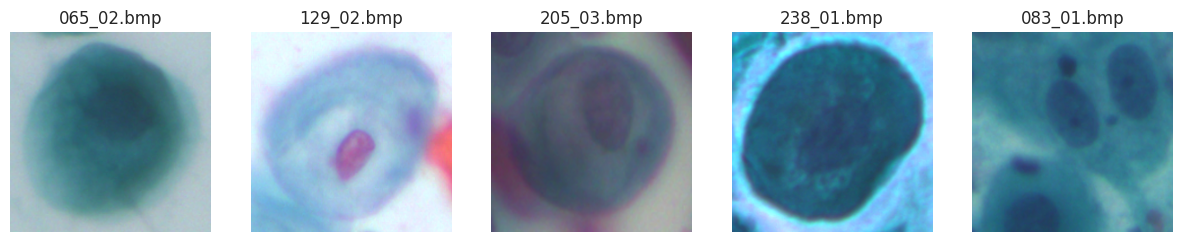

Split: train, Category: im_Superficial-Intermediate


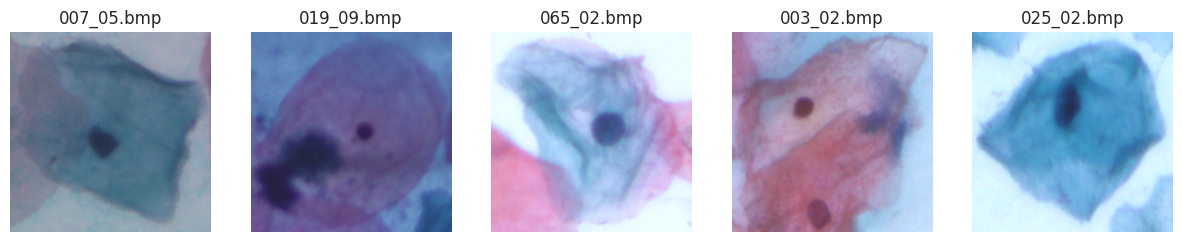

Split: train, Category: im_Dyskeratotic


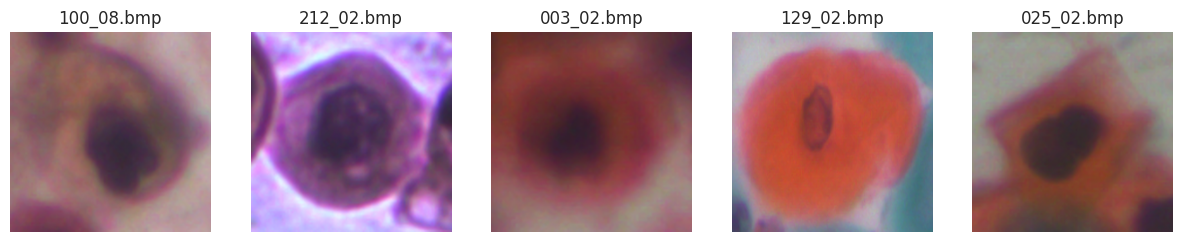

Split: train, Category: im_Koilocytotic


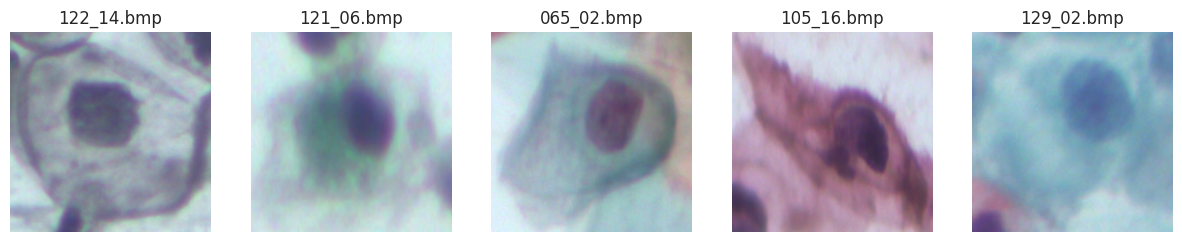

Split: train, Category: im_Parabasal


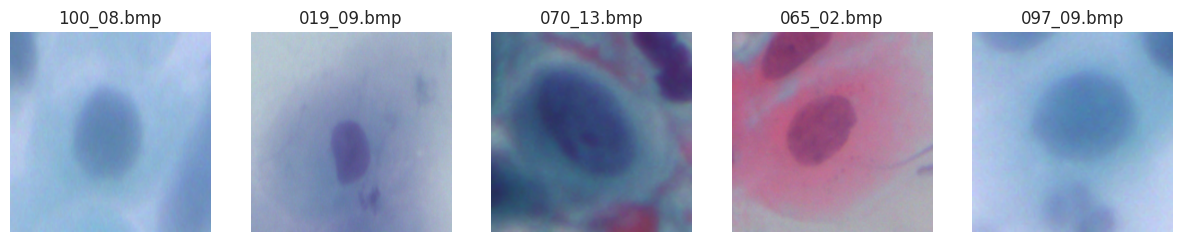

Split: val, Category: im_Metaplastic


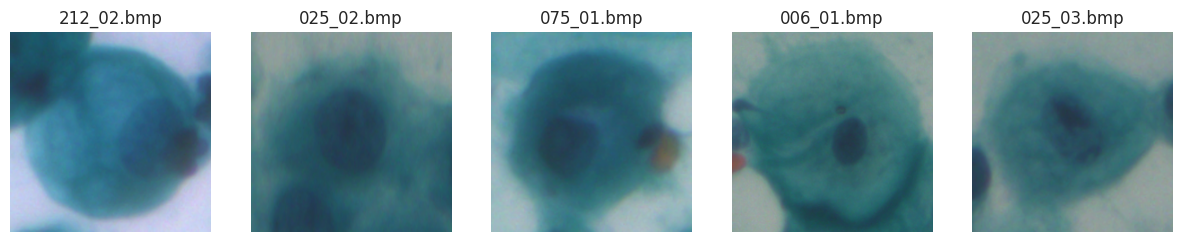

Split: val, Category: im_Superficial-Intermediate


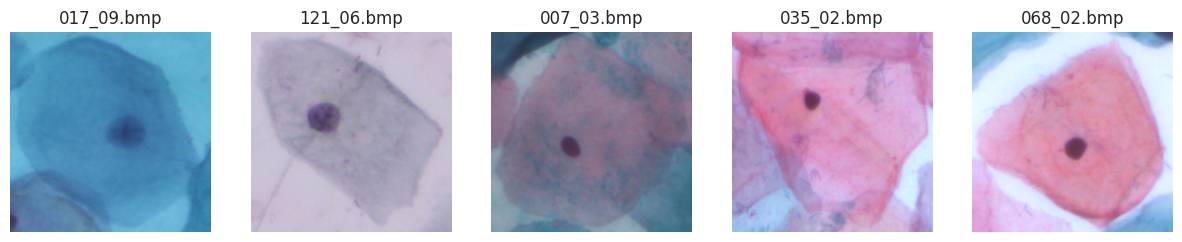

Split: val, Category: im_Dyskeratotic


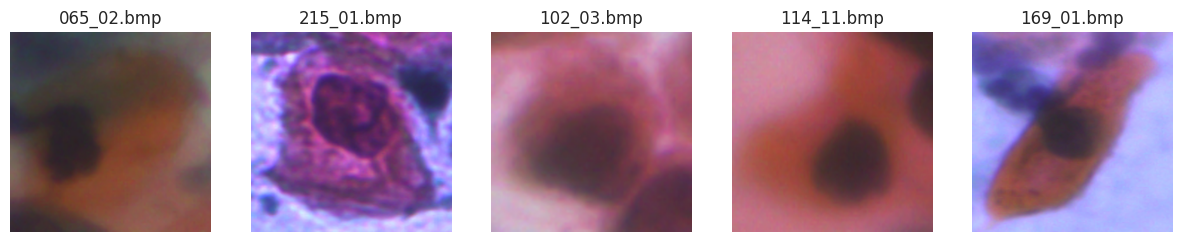

Split: val, Category: im_Koilocytotic


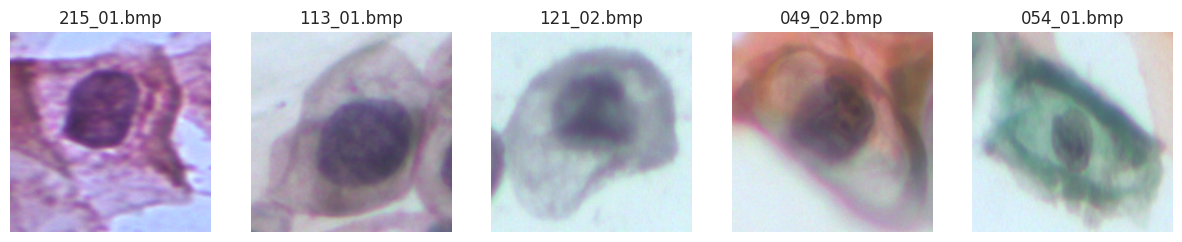

Split: val, Category: im_Parabasal


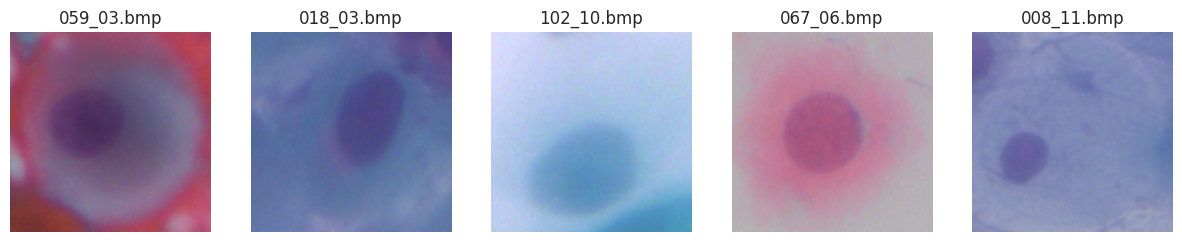

Split: test, Category: im_Metaplastic


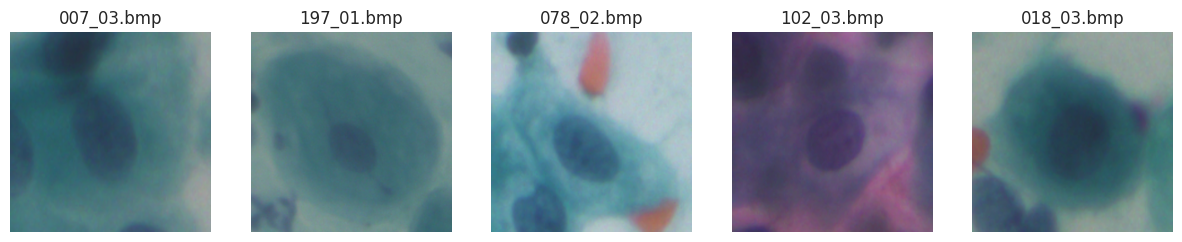

Split: test, Category: im_Superficial-Intermediate


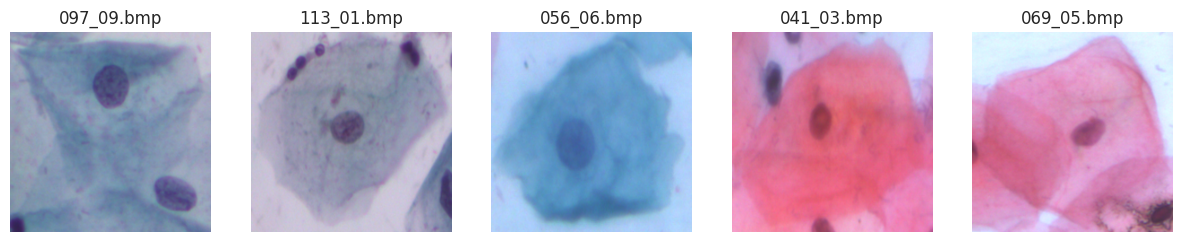

Split: test, Category: im_Dyskeratotic


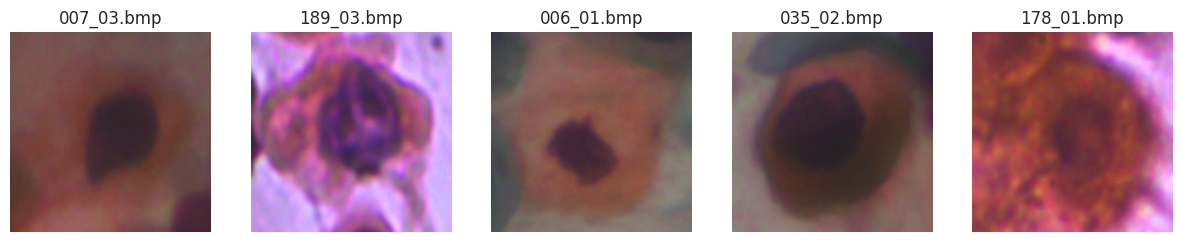

Split: test, Category: im_Koilocytotic


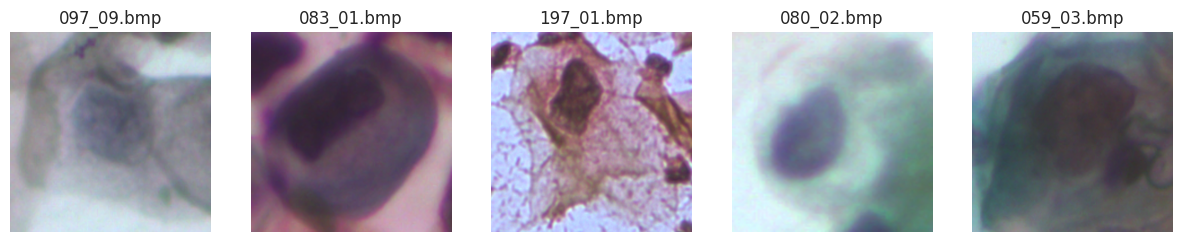

Split: test, Category: im_Parabasal


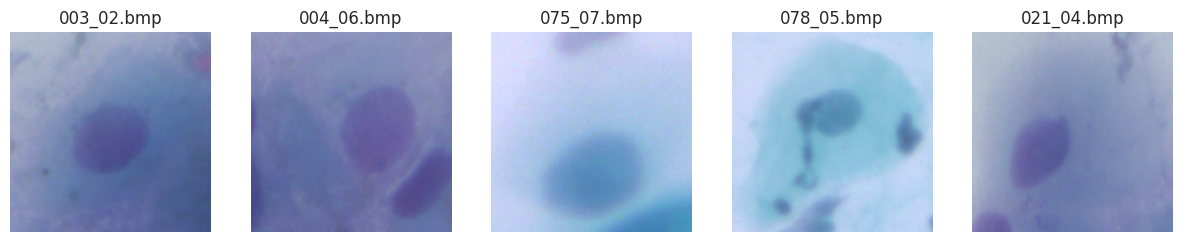

In [18]:

def display_images_from_split(output_dir, split, num_images=5):
    split_dir = os.path.join(output_dir, split)
    categories = [d for d in os.listdir(split_dir) if os.path.isdir(os.path.join(split_dir, d))]

    for category in categories:
        category_dir = os.path.join(split_dir, category)
        image_files = [f for f in os.listdir(category_dir) if f.endswith(('.bmp', '.jpg', '.png'))][:num_images]
        
        print(f"Split: {split}, Category: {category}")
        fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))
        for i, image_file in enumerate(image_files):
            img_path = os.path.join(category_dir, image_file)
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(image_file)
        plt.show()

for split in ['train', 'val', 'test']:
    display_images_from_split(output_dir, split, num_images=5)


# Train transfer learning models

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import InceptionV3, MobileNetV2, InceptionResNetV2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from scipy.spatial.distance import euclidean, cityblock, cosine

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=20
)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    '/kaggle/working/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_data = val_datagen.flow_from_directory(
    '/kaggle/working/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 2832 images belonging to 5 classes.
Found 608 images belonging to 5 classes.


In [21]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [22]:
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    plt.figure(figsize=(12, 8))
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.yticks(fontsize=10)
    plt.grid(False)
    plt.title('Confusion Matrix')
    plt.show()


In [23]:
def plot_roc_curve(true_labels, predicted_probs, class_names):

    true_labels_binarized = label_binarize(true_labels, classes=np.arange(len(class_names)))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(true_labels_binarized.ravel(), predicted_probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(class_names)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(class_names)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.figure(figsize=(10, 7))

    for i, class_name in enumerate(class_names):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for {class_name} (area = {roc_auc[i]:.2f})')

    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
             color='navy', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()


In [24]:
def evaluate_model(history, true_labels, predicted_labels, class_names, predictions):
    plot_training_history(history)    
    plot_confusion_matrix(true_labels, predicted_labels, class_names)
    plot_roc_curve(true_labels, predictions, class_names)

## Inception v3

In [25]:
def build_model(base_model):
    base_model.trainable = False  
    inputs = base_model.input
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(5, activation='softmax')(x)
    model = Model(inputs, x)
    return model

In [26]:
checkpoint = ModelCheckpoint(
    'kaggle/working/checkpoints/inception_v3_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

inception_v3_model = build_model(InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
inception_v3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
history = inception_v3_model.fit(train_data, validation_data=val_data, epochs=20,callbacks=[checkpoint])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.6090 - loss: 1.0659
Epoch 1: val_accuracy improved from -inf to 0.79441, saving model to kaggle/working/checkpoints/inception_v3_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 403ms/step - accuracy: 0.6115 - loss: 1.0590 - val_accuracy: 0.7944 - val_loss: 0.5492
Epoch 2/20
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8062 - loss: 0.5131
Epoch 2: val_accuracy improved from 0.79441 to 0.84211, saving model to kaggle/working/checkpoints/inception_v3_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 29s 299ms/step - accuracy: 0.8065 - loss: 0.5126 - val_accuracy: 0.8421 - val_loss: 0.4649
Epoch 3/20
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8341 - loss: 0.4437
Epoch 3: val_accuracy improved from 0.84211 to 0.85362, saving model to kaggle/working/checkpoints/inception_v3_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 295ms/step - accuracy: 0.8340 - loss: 0.4437 - val_accuracy: 0.8536 - val_loss: 0.4139
Epoch 4/20
88/89 ━━━━━━━━━━━━━

In [28]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_data = test_datagen.flow_from_directory(
    '/kaggle/working/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', 
    shuffle = False
)

Found 609 images belonging to 5 classes.


In [33]:
checkpoint = ModelCheckpoint(
    'kaggle/working/checkpoints/mobilenet_v2_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

mobilenet_v2_model = build_model(MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
mobilenet_v2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
history_mv2 = mobilenet_v2_model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[checkpoint])

Epoch 1/20
87/89 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.6288 - loss: 0.9259
Epoch 1: val_accuracy improved from -inf to 0.81414, saving model to kaggle/working/checkpoints/mobilenet_v2_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 340ms/step - accuracy: 0.6324 - loss: 0.9177 - val_accuracy: 0.8141 - val_loss: 0.5146
Epoch 2/20
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8283 - loss: 0.4594
Epoch 2: val_accuracy improved from 0.81414 to 0.87829, saving model to kaggle/working/checkpoints/mobilenet_v2_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 282ms/step - accuracy: 0.8284 - loss: 0.4594 - val_accuracy: 0.8783 - val_loss: 0.3436
Epoch 3/20
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.8548 - loss: 0.3983
Epoch 3: val_accuracy did not improve from 0.87829
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 280ms/step - accuracy: 0.8548 - loss: 0.3982 - val_accuracy: 0.8766 - val_loss: 0.3302
Epoch 4/20
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.8714 - loss: 0.3582
Epoch 

In [35]:
predictions = mobilenet_v2_model.predict(test_data)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step
Classification Report:
                             precision    recall  f1-score   support

            im_Dyskeratotic       0.87      0.94      0.91       122
            im_Koilocytotic       0.85      0.78      0.82       124
             im_Metaplastic       0.82      0.85      0.83       119
               im_Parabasal       0.95      0.93      0.94       119
im_Superficial-Intermediate       0.98      0.97      0.98       125

                   accuracy                           0.89       609
                  macro avg       0.90      0.89      0.89       609
               weighted avg       0.90      0.89      0.89       609



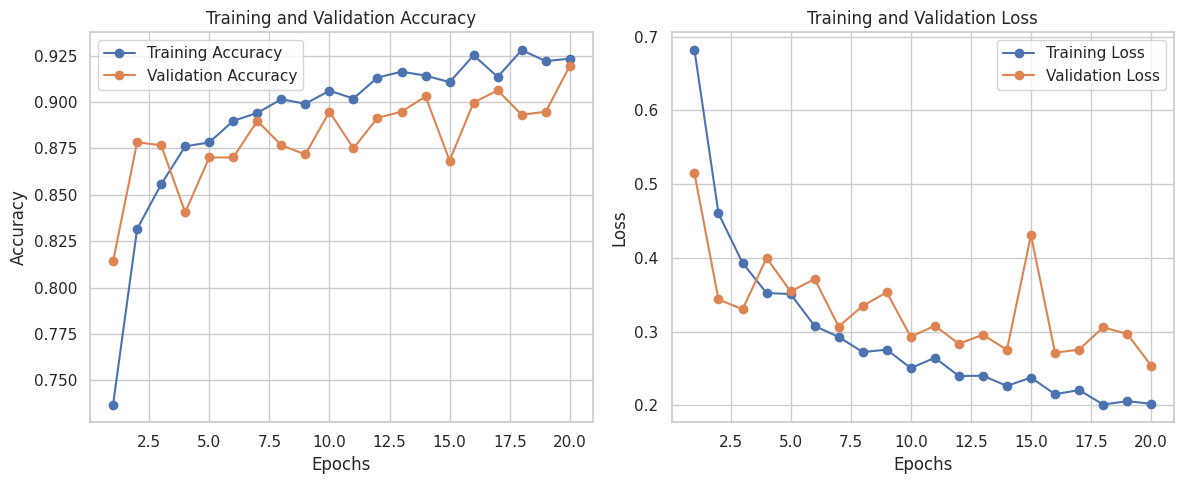

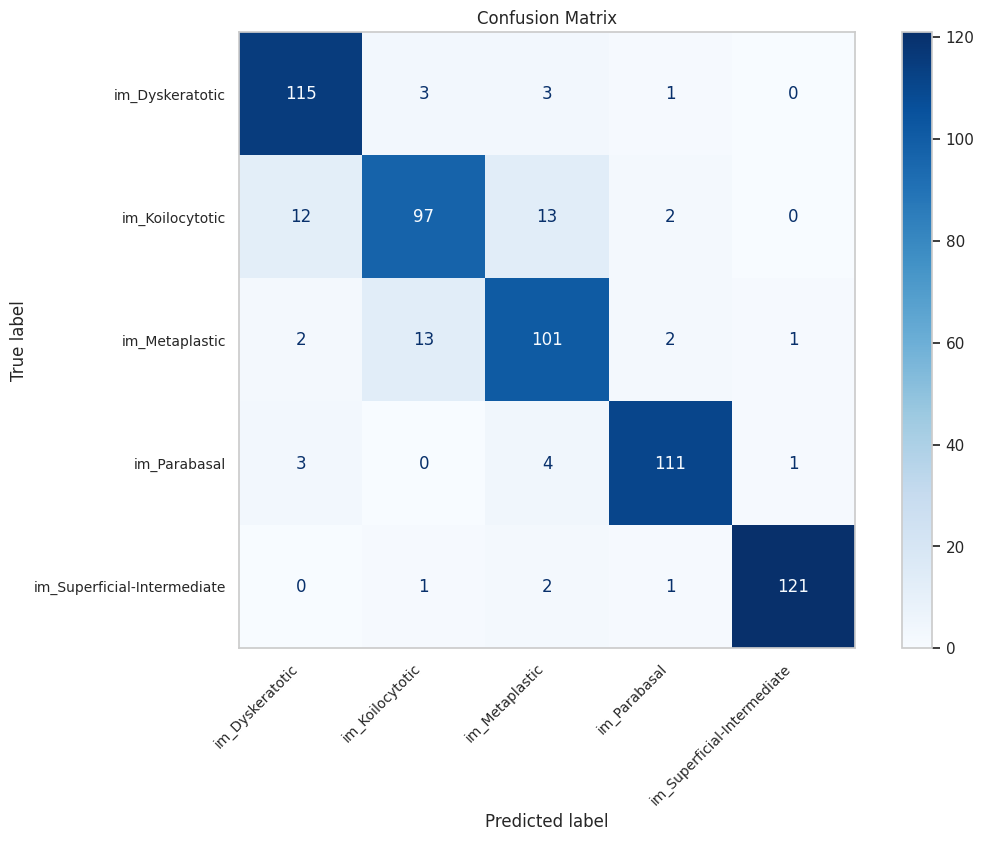

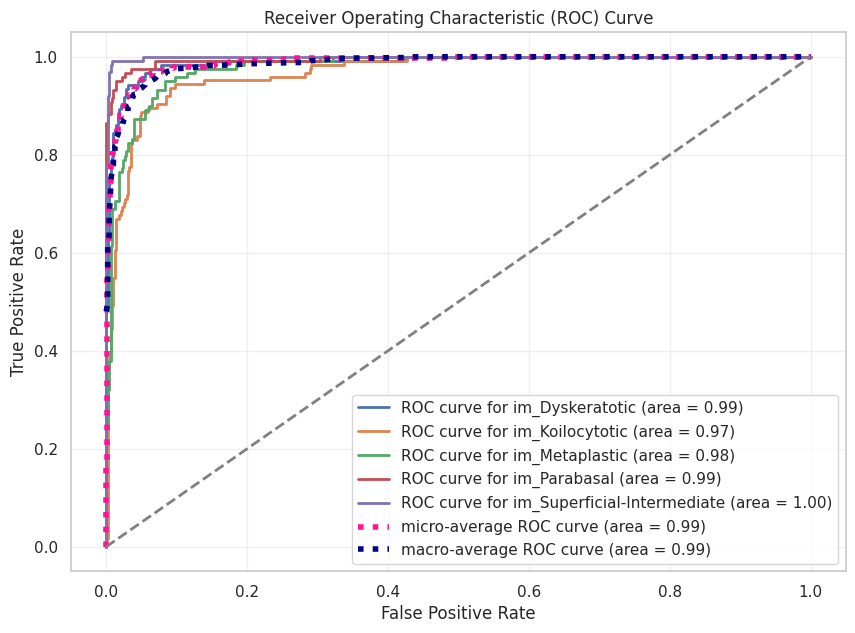

In [36]:
evaluate_model(history_mv2, true_classes, predicted_classes, class_labels, predictions)